# Template Method

## O que é

O padrao Template Method define a estrutura básica de um algoritmo e permite que subclasses sobre-escrevam partes desse algoritmo sem alterar a estrutura como um todo.

## Razoes para o uso

O Template Method é útil para casos em que há  "família" de métodos que têm uma estrutura similar, mas diferem em alguns passos. Usando _inheritance_, a classe base pode estabelecer o "esqueleto" do algoritmo e a implementacao de alguns (ou todos) seus passos, deixando às subclasses a tarefa de sobre-escrever ou implementar outros passos. Com isso, é possível que as diferentes implementacoes do algoritmo reaproveitem os passos que têm em comum, evitando a repeticao.

## Um exemplo básico

Em materiais de estudos sobre o Template Pattern, um exemplo muito comum é o de uma receita. Para fazer um bolo de chocolate, por exemplo, precisaríamos seguir os seguintes passos: 

In [1]:
def make_chocolate_cake():
    print("Comprar chocolate, ovos, manteiga, acucar e farinha")
    print("Pré-aquecer o forno")
    print("Misturar os ingredientes")
    print("Cobrir o bolo com chocolate granulado")
    print("Assar o bolo")
    print("Tirar o bolo do forno")
    print("Esperar o bolo esfriar")

make_chocolate_cake()

Comprar chocolate, ovos, manteiga, acucar e farinha
Misturar os ingredientes
Pré-aquecer o forno
Assar o bolo
Tirar o bolo do forno
Esperar o bolo esfriar


O método funciona, mas está longe de ser o ideal. Se quisermos fazer um bolo de cenoura, por exemplo, teríamos que criar um novo método do zero:

In [ ]:
def make_carrot_cake():
    print("Comprar cenoura, ovos, canela, manteiga, acucar e farinha")
    print("Pré-aquecer o forno")
    print("Misturar os ingredientes")
    print("Polvilhar o bolo com canela")
    print("Assar o bolo")
    print("Tirar o bolo do forno")
    print("Esperar o bolo esfriar")

make_carrot_cake()

Nao é difícil ver que os dois métodos têm muito em comum e divergem apenas em dois pontos: a compra dos ingredientes e a etapa imediatamente anterior à mistura dos ingredientes. Há muita repeticao e pouca escalabilidade. Vejamos como o Template method resolve esse problema:

In [6]:
import abc


class Cake(abc.ABC):
           
    @abc.abstractmethod
    def buy_ingredients(self):
        pass
    
    def pre_heat_oven(self):
        print("Pré-aquecer o forno")
    
    def mix_ingredients(self):
        print("Misturar os ingredientes")
           
    @abc.abstractmethod    
    def prepare_topping(self):
        pass
    
    def bake(self):
        print("Assar o bolo")
    
    def remove_cake(self):
        print("Tirar o bolo do forno")
    
    def wait_for_cake(self):
        print("Esperar o bolo esfriar")
            
    def make_cake(self):
        self.buy_ingredients()
        self.pre_heat_oven()
        self.mix_ingredients()
        self.prepare_topping()
        self.bake()
        self.remove_cake()
        self.wait_for_cake()
           

class ChocolateCake(Cake):
    def buy_ingredients(self):
        print("Comprar chocolate, ovos, manteiga, acucar e farinha")
    
    def prepare_topping(self):
        print("Cobrir o bolo com chocolate granulado")

        
class CarrotCake(Cake):
    def buy_ingredients(self):
        print("Comprar cenoura, ovos, canela, manteiga, acucar e farinha")
    
    def prepare_topping(self):
        print("Polvilhar o bolo com canela")

           
cake1 = ChocolateCake()
cake2 = CarrotCake()

cake1.make_cake()
print()
cake2.make_cake()

Comprar chocolate, ovos, manteiga, acucar e farinha
Pré-aquecer o forno
Misturar os ingredients
Cobrir o bolo com chocolate granulado
Assar o bolo
Tirar o bolo do forno
Esperar o bolo esfriar

Comprar cenoura, ovos, canela, manteiga, acucar e farinha
Pré-aquecer o forno
Misturar os ingredients
Polvilhar o bolo com canela
Assar o bolo
Tirar o bolo do forno
Esperar o bolo esfriar


`make_cake`, nesse caso, seria nosso Template: um método que as subclasses jamais sobre-escrevem, e que é responsável por invocar todos os métodos na ordem pré-estabelecida. Com isso, pudemos reaproveitar todos os elementos em comum entre as duas receitas, sem a necessidade de duplicar o código.

## Template X Strategy

Enquanto o padrao Strategy usa _object composition_ para substituir um algoritmo dentro de uma classe por outro algoritmo intercambiável, o Template Method usa _inheritance_ para substituir partes de um algoritmo, mas manter a estrutura geral. Se a única diferenca entre um bolo de chocolate e um bolo de cenoura fosse uma etapa do preparo, por exemplo, poderíamos dar conta da situacao usando diferentes objetos _strategy_ para substituir essa parte do algoritmo, mas haveria uma explosao de complexidade se diferentes bolos precisassem substituir partes diferentes da receita. 

O Template Method evita esse problema delegando o controle às subclasses que mantém a possibilidade de sobrescrever qualquer parte do algoritmo -- nao apenas os métodos abstratos. Se quisermos comer um bolo quente, por exemplo, basta substituir o método `wait_for_cake`:

In [7]:
class HotChocolateCake(ChocolateCake):
    def wait_for_cake(self):
        pass

c3 = HotChocolateCake()
c3.make_cake()

Comprar chocolate, ovos, manteiga, acucar e farinha
Pré-aquecer o forno
Misturar os ingredients
Cobrir o bolo com chocolate granulado
Assar o bolo
Tirar o bolo do forno


Essa possibilidade, no entanto, deve ser usada com cuidado para que a subclasse nao sobrescreva uma parte essencial do Template Method.

## Hooks

Para aumentar a flexibilidade do Template Method, uma prática comum é a definicao de _hooks_: métodos vazios que sao executados em diferentes partes do ciclo de vida do Template Method. Voltando à nossa classe Cake, uma implementacao com _hooks_ poderia ficar assim:

In [11]:
class Cake(abc.ABC):
    
    def before_buying_ingredients(self):
        pass
           
    @abc.abstractmethod
    def buy_ingredients(self):
        pass
    
    def pre_heat_oven(self):
        print("Pré-aquecer o forno")
    
    def before_mixing_ingredients(self):
        pass
    
    def mix_ingredients(self):
        print("Misturar os ingredientes")
           
    @abc.abstractmethod    
    def prepare_topping(self):
        pass

    def before_baking(self):
        pass
    
    def bake(self):
        print("Assar o bolo")
    
    def before_removing(self):
        pass
    
    def remove_cake(self):
        print("Tirar o bolo do forno")
    
    def after_removing(self):
        pass
    
    def wait_for_cake(self):
        print("Esperar o bolo esfriar")
    
    def after_waiting(self):
        pass

            
    def make_cake(self):
        self.before_buying_ingredients()
        self.buy_ingredients()
        self.pre_heat_oven()
        self.before_mixing_ingredients()
        self.mix_ingredients()
        self.prepare_topping()
        self.before_baking()
        self.bake()
        self.before_removing()
        self.remove_cake()
        self.wait_for_cake()
        self.after_waiting()

        
class ChocolateCake(Cake):
    def buy_ingredients(self):
        print("Comprar chocolate, ovos, manteiga, acucar e farinha")
    
    def prepare_topping(self):
        print("Cobrir o bolo com chocolate granulado")

cake1 = ChocolateCake()
cake1.make_cake()
        

Comprar chocolate, ovos, manteiga, acucar e farinha
Pré-aquecer o forno
Misturar os ingredientes
Cobrir o bolo com chocolate granulado
Assar o bolo
Tirar o bolo do forno
Esperar o bolo esfriar


À primeira vista, a única coisa que fizemos foi encher a classe de métodos que nao fazem absolutamente nada e que, ao contrário de `buy_ingredients` e `prepare_topping`, nao precisam ser implementados nas subclasses. Porém, esses métodos opcionais -- chamados de _hooks_ -- permitem que o Template Method tenha uma enorme flexibilidade. Suponhamos, por exemplo, que estejamos vivendo uma pandemia global e precisemos tomar medidas adicionais para preparar o nosso bolo. Com a classe original, sem _hooks_, precisaríamos reescrever todo o código. A nova versao, porém, está pronta para 2020:

In [12]:
class QuarantineChocolateCake(ChocolateCake):
    
    def before_buying_ingredients(self):
        print("Vestir uma máscara")
    
    def before_mixing_ingredients(self):
        print("Lavar todas as compras")
    
    def before_baking(self):
        print("Chamar os amigos para uma festa do bolo no Zoom")
        
    def before_removing(self):
        print("Lavar as maos")
        
    def after_waiting(self):
        print("Comer o bolo na frente do computador")
        

cake1 = QuarantineChocolateCake()
cake1.make_cake()

Vestir uma máscara
Comprar chocolate, ovos, manteiga, acucar e farinha
Pré-aquecer o forno
Lavar todas as compras
Misturar os ingredientes
Cobrir o bolo com chocolate granulado
Chamar os amigos para uma festa do bolo no Zoom
Assar o bolo
Lavar as maos
Tirar o bolo do forno
Esperar o bolo esfriar
Comer o bolo na frente do computador


## Vantagens e desvantagens:

Prós:
- Diminui a repeticao
- Garante um comportamento padrao

Contras:
- Um template method muito complexo pode tornar-se difícil de manter
- O uso de uma estrutura comum reduz a flexibilidade na implementacao do algoritmo

## Estrutura:

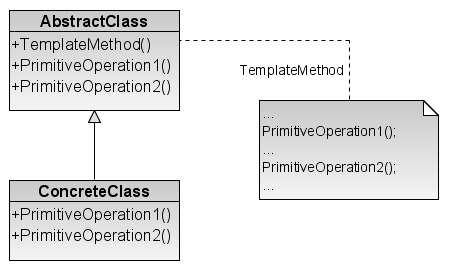